In [32]:
import dask
import dask.array as da
import numpy as np
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scienceplots
from scipy import stats
import time
import warnings

In [2]:
plt.style.use(['science', 'notebook', 'grid'])

In [33]:
os.cpu_count()

11

## Problem 2

In [3]:
df = pd.read_csv('../data/moores.csv', skiprows=1)
df.head()

,Name,Transistor Count,Year,Manufacturer,Process,Area,Source File
0,Transistor Computer,92,1953,University of Manchester,NaN,NaN,Transistor_count_8.csv
1,TRADIC,700,1954,Bell Labs,NaN,NaN,Transistor_count_8.csv
2,Transistor Computer (full size),250,1955,University of Manchester,NaN,NaN,Transistor_count_8.csv
3,IBM 608,3000,1955,IBM,NaN,NaN,Transistor_count_8.csv
4,ETL Mark III,130,1956,Electrotechnical Laboratory,NaN,NaN,Transistor_count_8.csv


In [4]:
len(df)

508

In [5]:
df = df[["Name", "Transistor Count", "Year", "Manufacturer"]].dropna(
    subset=["Transistor Count", "Year"])
df.head()

,Name,Transistor Count,Year,Manufacturer
0,Transistor Computer,92,1953,University of Manchester
1,TRADIC,700,1954,Bell Labs
2,Transistor Computer (full size),250,1955,University of Manchester
3,IBM 608,3000,1955,IBM
4,ETL Mark III,130,1956,Electrotechnical Laboratory


In [6]:
df.dtypes

Name                   str
Transistor Count    object
Year                 int64
Manufacturer           str
dtype: object

In [7]:
df["Transistor Count"] = pd.to_numeric(df["Transistor Count"], errors="coerce")
len(df)

508

In [8]:
df.dtypes

Name                    str
Transistor Count    float64
Year                  int64
Manufacturer            str
dtype: object

In [9]:
df["log2_transistors"] = np.log2(df["Transistor Count"])
df.head()

,Name,Transistor Count,Year,Manufacturer,log2_transistors
0,Transistor Computer,92.0,1953,University of Manchester,6.523562
1,TRADIC,700.0,1954,Bell Labs,9.451211
2,Transistor Computer (full size),250.0,1955,University of Manchester,7.965784
3,IBM 608,3000.0,1955,IBM,11.550747
4,ETL Mark III,130.0,1956,Electrotechnical Laboratory,7.022368


In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(
    df["Year"], df["log2_transistors"]
)

In [11]:
doubling_time = 1.0 / slope
print(f"True Doubling time = 1 / slope = {doubling_time:.2f} years")
print("Commonly cited Moore's Law doubling time: ~2 years")
print(f"Difference: {abs(doubling_time - 2.0):.2f} years")

True Doubling time = 1 / slope = 2.24 years
Commonly cited Moore's Law doubling time: ~2 years
Difference: 0.24 years


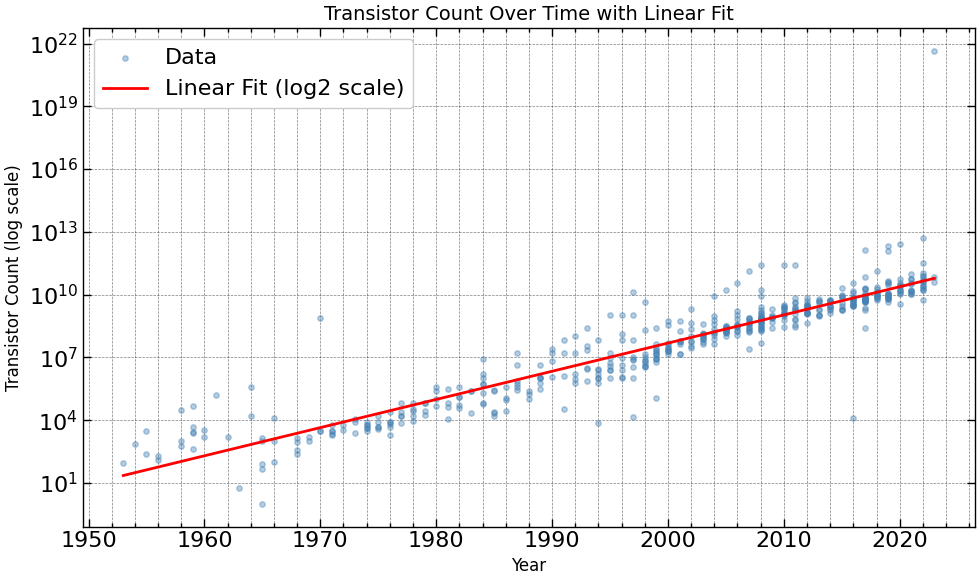

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(
    df["Year"], df["Transistor Count"], alpha=0.4, s=15, label="Data", color="steelblue"
)
year_range = np.array([df["Year"].min(), df["Year"].max()])
predicted_log2 = intercept + slope * year_range
predicted_transistors = 2 ** predicted_log2
ax.plot(
    year_range, predicted_transistors, color="red", label="Linear Fit (log2 scale)", linewidth=2
)
ax.set_yscale("log")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Transistor Count (log scale)", fontsize=12)
ax.set_title("Moore's Law: Transistor Count vs Year", fontsize=14)
ax.legend()
ax.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("problem2_moores_law.png")
plt.show()

In [13]:
df["Year"].min()

np.int64(1953)

In [14]:
first_decade_df = df[df["Year"] <= df["Year"].min() + 10]

In [15]:
slope_first_decade, intercept_first_decade, r_value_fd, p_value_fd, std_err_fd = stats.linregress(
    first_decade_df["Year"], first_decade_df["log2_transistors"]
)

In [16]:
doubling_time_fd = 1.0 / slope_first_decade
print(f"Doubling time for first decade = 1 / slope = {doubling_time_fd:.2f} years")
print("Commonly cited Moore's Law doubling time: ~2 years")

Doubling time for first decade = 1 / slope = 4.00 years
Commonly cited Moore's Law doubling time: ~2 years


In [17]:
last_decade_df = df[df["Year"] >= df["Year"].max() - 10]

In [18]:
slope_last_decade, intercept_last_decade, r_value_ld, p_value_ld, std_err_ld = stats.linregress(
    last_decade_df["Year"], last_decade_df["log2_transistors"]
)

In [19]:
doubling_time_ld = 1.0 / slope_last_decade
print(f"Doubling time for last decade = 1 / slope = {doubling_time_ld:.2f} years")
print("Commonly cited Moore's Law doubling time: ~2 years")

Doubling time for last decade = 1 / slope = 1.44 years
Commonly cited Moore's Law doubling time: ~2 years


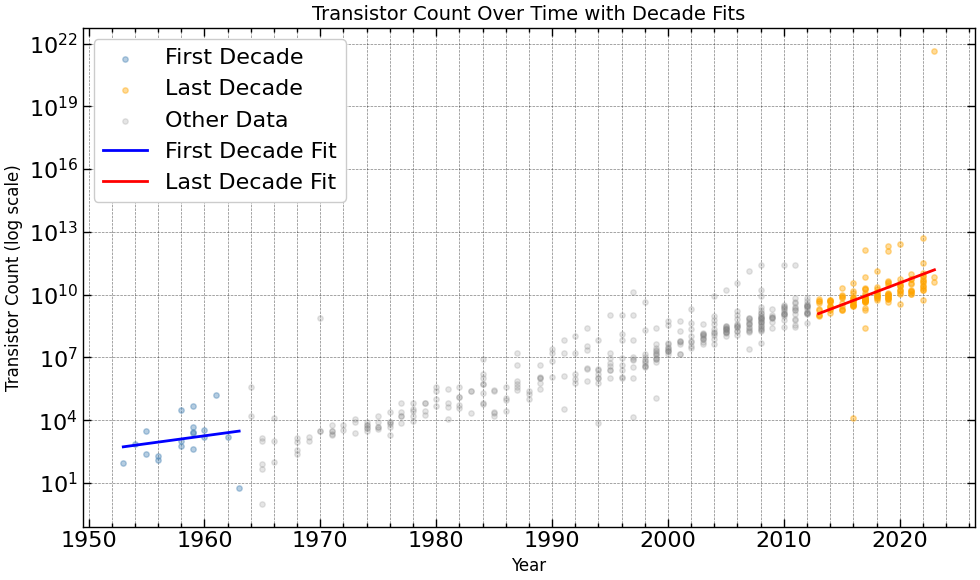

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(
    first_decade_df["Year"], first_decade_df["Transistor Count"], alpha=0.4, s=15, label="First Decade", color="steelblue"
)
ax.scatter(
    last_decade_df["Year"], last_decade_df["Transistor Count"], alpha=0.4, s=15, label="Last Decade", color="orange"
)
remaining_df = df[~df.index.isin(first_decade_df.index) & ~df.index.isin(last_decade_df.index)]
ax.scatter(
    remaining_df["Year"], remaining_df["Transistor Count"], alpha=0.2, s=15, label="Other Data", color="gray"
)
year_range_fd = np.array([first_decade_df["Year"].min(), first_decade_df["Year"].max()])
predicted_log2_fd = intercept_first_decade + slope_first_decade * year_range_fd
predicted_transistors_fd = 2 ** predicted_log2_fd
ax.plot(
    year_range_fd, predicted_transistors_fd, color="blue", label="First Decade Fit", linewidth=2
)
year_range_ld = np.array([last_decade_df["Year"].min(), last_decade_df["Year"].max()])
predicted_log2_ld = intercept_last_decade + slope_last_decade * year_range_ld
predicted_transistors_ld = 2 ** predicted_log2_ld
ax.plot(
    year_range_ld, predicted_transistors_ld, color="red", label="Last Decade Fit", linewidth=2
)
ax.set_yscale("log")
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Transistor Count (log scale)", fontsize=12)
ax.set_title("Moore's Law: Early vs. Late Era", fontsize=14)
ax.legend()
ax.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.savefig("problem2_early_vs_late.png")
plt.show()

## Problem 3

In [21]:
ARRAY_SIZE_P3 = 10000
NUM_TRIALS_P3 = 30

In [22]:
A = np.random.standard_normal((ARRAY_SIZE_P3, ARRAY_SIZE_P3))

In [23]:
def sum_row_major(arr):
    total = 0.0
    for i in range(arr.shape[0]):
        for j in range(arr.shape[1]):
            total += arr[i, j]
    return total

In [24]:
def sum_column_major(arr):
    total = 0.0
    for j in range(arr.shape[1]):
        for i in range(arr.shape[0]):
            total += arr[i, j]
    return total

In [ ]:
row_times = []

for rep in range(NUM_TRIALS_P3):
    t0 = time.perf_counter()
    _ = sum_row_major(A)
    t1 = time.perf_counter()
    row_times.append(t1 - t0)
    if (rep + 1) % 10 == 0:
        print(f"  Trial {rep+1}/{NUM_TRIALS_P3} done")

  Repeat 10/30 done
  Repeat 20/30 done
  Repeat 30/30 done


In [26]:
col_times = []

for rep in range(NUM_TRIALS_P3):
    t0 = time.perf_counter()
    _ = sum_column_major(A)
    t1 = time.perf_counter()
    col_times.append(t1 - t0)
    if (rep + 1) % 10 == 0:
        print(f"  Trial {rep+1}/{NUM_TRIALS_P3} done")


Caching the list of root modules, please wait!
(This will only be done once - type '%rehashx' to reset cache!)

  Repeat 10/30 done
  Repeat 20/30 done
  Repeat 30/30 done


In [27]:
np_times = []
for rep in range(NUM_TRIALS_P3):
    t0 = time.perf_counter()
    _ = np.sum(A)
    t1 = time.perf_counter()
    np_times.append(t1 - t0)

In [28]:
row_mean = np.mean(row_times)
row_std = np.std(row_times)
col_mean = np.mean(col_times)
col_std = np.std(col_times)
np_mean = np.mean(np_times)
np_std = np.std(np_times)

In [51]:
row_mean, row_std

(np.float64(7.2538599791694045), np.float64(0.22879524654974223))

In [52]:
col_mean, col_std

(np.float64(7.4301355624668455), np.float64(0.2888943570199436))

In [53]:
np_mean, np_std

(np.float64(0.014843648700237584), np.float64(0.00539400575728627))

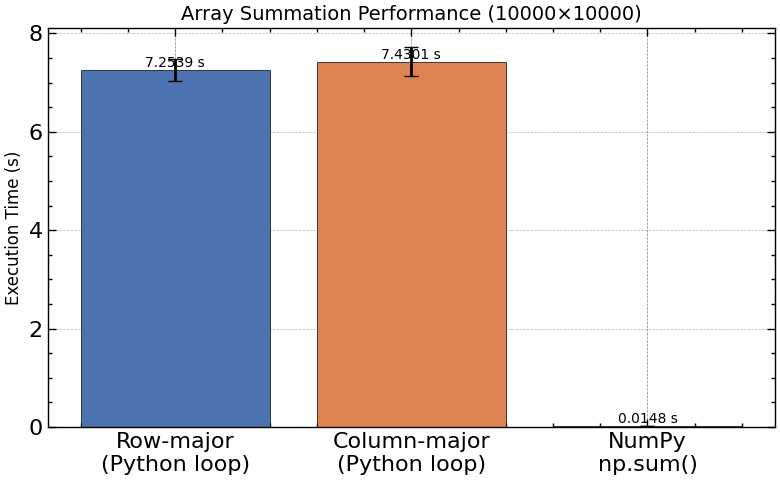

In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
methods = ["Row-major\n(Python loop)", "Column-major\n(Python loop)", "NumPy\nnp.sum()"]
means = [row_mean, col_mean, np_mean]
stds = [row_std, col_std, np_std]
colors = ["#4C72B0", "#DD8452", "#55A868"]
bars = ax.bar(
    methods, means, yerr=stds, capsize=5, color=colors, edgecolor="black", linewidth=0.5
)
ax.set_ylabel("Execution Time (s)", fontsize=12)
ax.set_title(
    f"Array Summation Performance ({ARRAY_SIZE_P3}" + u"\u00D7" + f"{ARRAY_SIZE_P3})",
    fontsize=14,
)
ax.grid(axis="y", alpha=0.3)

# Add value labels on bars
for bar, mean_val in zip(bars, means):
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{mean_val:.4f} s",
        ha="center",
        va="bottom",
        fontsize=10,
    )

plt.tight_layout()
plt.savefig("problem3_performance.png", dpi=150)
plt.show()

## Problem 4

In [39]:
def compute_zscore_dask(n_rows, n_cols, workers):
    with dask.config.set(scheduler='threads', num_workers=workers):
        x = da.random.random((n_rows, n_cols), chunks='auto')
        mean = x.mean()
        std = x.std()
        zscore = (x - mean) / std
        result = zscore.compute()
    return result

In [40]:
strong_results = {}
base_rows = 20000
base_cols = 20000
core_counts = [1, 2, 3, 4]

In [41]:
for cores in core_counts:
    t0 = time.perf_counter()
    _ = compute_zscore_dask(base_rows, base_cols, cores)
    t1 = time.perf_counter()
    strong_results[cores] = t1 - t0

In [42]:
T1 = strong_results[1]
speedups = {cores: T1 / strong_results[cores] for cores in core_counts}
efficiencies = {cores: speedups[cores] / cores for cores in core_counts}

In [56]:
efficiencies

{1: 1.0, 2: 0.8430932189835704, 3: 0.6043604389672568, 4: 0.4631986409188904}

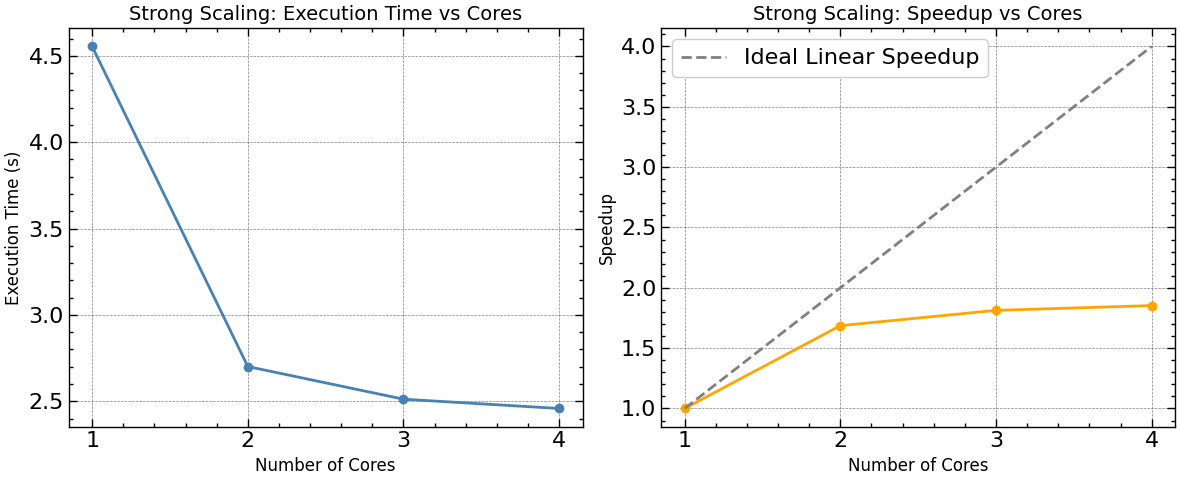

In [44]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(core_counts, [strong_results[cores] for cores in core_counts], marker='o', color='steelblue')
ax1.set_xlabel("Number of Cores", fontsize=12)
ax1.set_ylabel("Execution Time (s)", fontsize=12)
ax1.set_title("Strong Scaling: Execution Time vs Cores", fontsize=14)
ax1.set_xticks(core_counts)

ax2.plot(core_counts, [speedups[cores] for cores in core_counts], marker='o', color='orange')
ax2.plot(core_counts, core_counts, linestyle='--', color='gray', label="Ideal Linear Speedup")
ax2.set_xlabel("Number of Cores", fontsize=12)
ax2.set_ylabel("Speedup", fontsize=12)
ax2.set_title("Strong Scaling: Speedup vs Cores", fontsize=14)
ax2.set_xticks(core_counts)
ax2.legend()

plt.tight_layout()
plt.savefig("problem4_strong_scaling.png", dpi=150)
plt.show()

In [45]:
base_size = 20000

weak_results = {}

In [46]:
for core in core_counts:
    n_rows = int(base_size * np.sqrt(core))
    n_cols = int(base_size * np.sqrt(core))
    t0 = time.perf_counter()
    _ = compute_zscore_dask(n_rows, n_cols, core)
    t1 = time.perf_counter()
    weak_results[core] = t1 - t0

In [57]:
weak_results

{1: 4.34476416700636,
 2: 11.81227016702178,
 3: 30.065115457982756,
 4: 64.54942350002239}

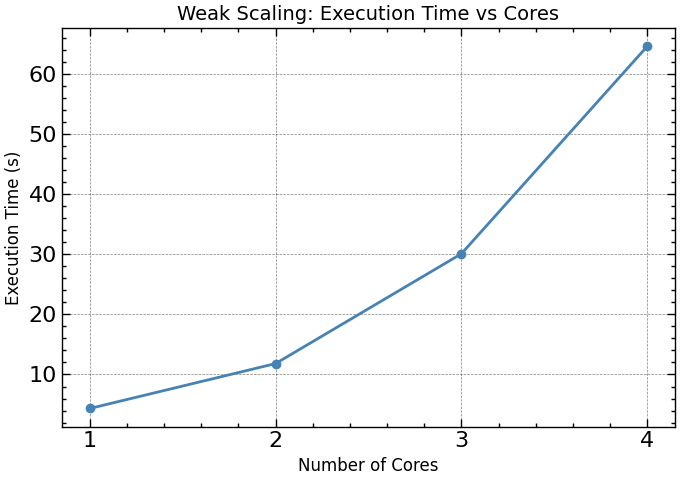

In [49]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(core_counts, [weak_results[cores] for cores in core_counts], marker='o', color='steelblue')
ax.set_xlabel("Number of Cores", fontsize=12)
ax.set_ylabel("Execution Time (s)", fontsize=12)
ax.set_title("Weak Scaling: Execution Time vs Cores", fontsize=14)
ax.set_xticks(core_counts)
plt.tight_layout()
plt.savefig("problem4_weak_scaling.png", dpi=150)
plt.show()